In [2]:
import pandas as pd
import numpy as np

import os
import re

import datetime
import seaborn as sns
import matplotlib.pyplot as plt


import plotly.express as px

pd.set_option('max_colwidth', 253) 

In [253]:
import yfinance as yf

### Load the data

In [4]:
happy_df = pd.read_csv("../data/tweets_happy.csv")
print(happy_df.shape)
happy_df.head()

(384647, 35)


,Unnamed: 0,Unnamed: 0.1,id,conversation_id,author_id,created_at,text,lang,source,public_metrics.like_count,...,delete_marketing,delete_followers,text_c,date,HAPPY_T_SCORE,HAPPY_T_LABEL_negative,HAPPY_T_LABEL_neutral,HAPPY_T_LABEL_positive,neg_score,pos_score
0,0,116783,1420592108684169218,1420567062104088582,46476214,2021-07-29T03:48:46.000Z,"@balajis In the next upcoming years we will find a way of executing software while paid by #bitcoin as an incentive to do so and keep software decentralized. Few understand the potential of this, the potential of open money",en,Twitter for Android,2,...,0,0,"@usermention In the next upcoming years we will find a way of executing software while paid by #hashtag as an incentive to do so and keep software decentralized. Few understand the potential of this, the potential of open money",2021-07-29,0.873877,0,1,0,0.0,0.0
1,2,677619,1416694500194328577,1416694500194328577,2173508552,2021-07-18T09:41:04.000Z,"2021 British Open live stream, watch online: Full coverage, TV channel, schedule for Round 4 on Sunday https://t.co/6J0qEDcKrQ ▶️ https://t.co/NKkDBVS66N #Bitcoin #Betting",en,dlvr.it,0,...,0,0,"2021 British Open live stream, watch online: Full coverage, TV channel, schedule for Round 4 on Sunday [url] ▶️ [url] #hashtag #hashtag",2021-07-18,0.909440,0,1,0,0.0,0.0
2,4,1057907,1413815903876050948,1411283964996685829,1448317573,2021-07-10T11:02:33.000Z,"@crypto_bearr @swapleonicorn All steps done ✅ \n\nFollow, Like, RT, Notification ✅ \n\nI want &amp; wish to win this 😊 \n\nTG username :- manan66 \nTG display name :- manan patel \n\n@swapleonicorn \n@crypto_bearr\n\n#LEOSARMY 🦁\n\n #PancakeSwap \n#...",en,Twitter for Android,0,...,0,0,"@usermention @usermention All steps done ✅ Follow, Like, RT, Notification ✅ I want & wish to win this 😊 TG username :- manan66 TG display name :- manan patel @usermention @usermention #hashtag 🦁 #hashtag #hashtag #hashtag #hashtag [url]",2021-07-10,0.941410,0,1,0,0.0,0.0
3,7,798090,1415622858970177537,1415489204574769152,992711335740878848,2021-07-15T10:42:45.000Z,@woonomic CBDC Will be the catalyst to broader #Bitcoin adoption. Just wait and see,en,Twitter for iPhone,4,...,0,0,@usermention CBDC Will be the catalyst to broader #hashtag adoption. Just wait and see,2021-07-15,0.908522,0,1,0,0.0,0.0
4,10,854876,1415159637595234305,1415159637595234305,1410439838986166273,2021-07-14T04:02:04.000Z,"🟩 Block 690920 ⛏ ⛏\n\n📅 14th Jul 2021, 04:00:40 GMT\n\n📣 2,249 tx with a value of 8,987.852 ₿ ($286.32m 🇺🇸) distributed to 5,860 recipients 💎🙌\n\n📣 18,755,756.25 ₿ (89.31313%) mined ⛏, 2,244,243.75 ₿ remaining 💰\n\n#bitcoin #tictoknextblock",en,Twitter,1,...,0,0,"🟩 Block 690920 ⛏ ⛏ 📅 14th Jul 2021, 04:00:40 GMT 📣 2,249 tx with a value of 8,987.852 ₿ ($286.32m 🇺🇸) distributed to 5,860 recipients 💎🙌 📣 18,755,756.25 ₿ (89.31313%) mined ⛏, 2,244,243.75 ₿ remaining 💰 #hashtag #hashtag",2021-07-14,0.928577,0,1,0,0.0,0.0


In [5]:
textblob_df = pd.read_csv("../data/tweets_textblob")
print(textblob_df.shape)
textblob_df.head()

(383243, 32)


,Unnamed: 0,Unnamed: 0.1,id,conversation_id,author_id,created_at,text,lang,source,public_metrics.like_count,...,delete_project,delete_airdrop,delete_referral,delete_marketing,delete_followers,text_clean,date,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Score
0,0,307056,1452996469687005187,1452996469687005187,1411930760555139072,2021-10-26T13:52:08.000Z,1st in binance &amp; 11st in Coin Market Cap\nTo The Moon🔥🎆🚀🚀🚀\n#bitcoinkiller\nWe Are #SHIBARMY and We don't need @elonmusk 😎\n@Shibtoken \n@BitcoinMagazine \n@binance \n@cz_binance \n#Binance #shiba #Bitcoin #cryptocurrency #RobinHoodApp #altcoins...,en,Twitter for Android,0,...,0,0,0,0,0,1st in binance & 11st in coin market cap to the moon🔥🎆🚀🚀🚀 bitcoinkiller we are shibarmy and we don't need 😎 binance shiba bitcoin cryptocurrency robinhoodapp altcoins coinmarketcap dogecoin,2021-10-26,0.000000,0.000000,Neutral
1,1,1905224,1443873469201109009,1443873469201109009,1443596919956193287,2021-10-01T09:40:35.000Z,Do you know that investing in cryptocurrency is very good especially when you're Investing with a long term Investment company that's is reliable and transparent?\n#cryptocurrencies #Bitcoin #investors,en,Twitter for Android,1,...,0,0,0,0,0,do you know that investing in cryptocurrency is very good especially when you're investing with a long term investment company that's is reliable and transparent? cryptocurrencies bitcoin investors,2021-10-01,0.726667,0.286667,Positive
2,2,1643426,1445438938265575424,1445438938265575424,1414681981007314951,2021-10-05T17:21:12.000Z,Looking for an elegant iOS #bitcoin price tracker. I’m an insufferable maxi so it can’t feature any garbage. Just a pure clean UI with the BTC price. Any recommendations??,en,Twitter for iPhone,2,...,0,0,0,0,0,looking for an elegant ios bitcoin price tracker. i’m an insufferable maxi so it can’t feature any garbage. just a pure clean ui with the btc price. any recommendations??,2021-10-05,0.733333,0.360317,Positive
3,6,363498,1452670667741093890,1452661103163551749,1300432445679038464,2021-10-25T16:17:31.000Z,"@100trillionUSD Mad respect for your #Bitcoin advice, ZERO respect for continuing to push the MAGA cult lies. Do better.",en,Twitter Web App,0,...,0,0,0,0,0,"mad respect for your bitcoin advice, zero respect for continuing to push the maga cult lies. do better.",2021-10-25,0.750000,-0.062500,Negative
4,7,1628628,1445515184630468612,1443595559609188360,1313541326798049280,2021-10-05T22:24:11.000Z,$SI Still going $BTC $ETH #BTC #Ethereum #cryptocurrency #shiba https://t.co/m0rZbYwZG2,en,Twitter for iPhone,2,...,0,0,0,0,0,$si still going $btc $eth btc ethereum cryptocurrency shiba,2021-10-05,0.000000,0.000000,Neutral


In [8]:
vader_df = pd.read_csv("../data/tweets_vader.csv")
print(vader_df.shape)
vader_df.head()

(384647, 33)


,Unnamed: 0,Unnamed: 0.1,id,conversation_id,author_id,created_at,text,lang,source,public_metrics.like_count,...,delete_airdrop,delete_referral,delete_marketing,delete_followers,text_c,date,VADER_POS,VADER_NEG,VADER_NEU,VADER_COM
0,0,307056,1452996469687005187,1452996469687005187,1411930760555139072,2021-10-26T13:52:08.000Z,1st in binance &amp; 11st in Coin Market Cap\nTo The Moon🔥🎆🚀🚀🚀\n#bitcoinkiller\nWe Are #SHIBARMY and We don't need @elonmusk 😎\n@Shibtoken \n@BitcoinMagazine \n@binance \n@cz_binance \n#Binance #shiba #Bitcoin #cryptocurrency #RobinHoodApp #altcoins...,en,Twitter for Android,0,...,0,0,0,0,1st in binance & 11st in Coin Market Cap To The Moon🔥🎆🚀🚀🚀 #hashtag We Are #hashtag and We don't need @usermention 😎 @usermention @usermention @usermention @usermention #hashtag #hashtag #hashtag #hashtag #hashtag #hashtag #hashtag #hashtag [url],2021-10-26,0.000,0.106,0.894,-0.5967
1,1,1905224,1443873469201109009,1443873469201109009,1443596919956193287,2021-10-01T09:40:35.000Z,Do you know that investing in cryptocurrency is very good especially when you're Investing with a long term Investment company that's is reliable and transparent?\n#cryptocurrencies #Bitcoin #investors,en,Twitter for Android,1,...,0,0,0,0,Do you know that investing in cryptocurrency is very good especially when you're Investing with a long term Investment company that's is reliable and transparent? #hashtag #hashtag #hashtag,2021-10-01,0.106,0.000,0.894,0.4927
2,2,1643426,1445438938265575424,1445438938265575424,1414681981007314951,2021-10-05T17:21:12.000Z,Looking for an elegant iOS #bitcoin price tracker. I’m an insufferable maxi so it can’t feature any garbage. Just a pure clean UI with the BTC price. Any recommendations??,en,Twitter for iPhone,2,...,0,0,0,0,Looking for an elegant iOS #hashtag price tracker. I’m an insufferable maxi so it can’t feature any garbage. Just a pure clean UI with the BTC price. Any recommendations??,2021-10-05,0.186,0.000,0.814,0.7319
3,6,363498,1452670667741093890,1452661103163551749,1300432445679038464,2021-10-25T16:17:31.000Z,"@100trillionUSD Mad respect for your #Bitcoin advice, ZERO respect for continuing to push the MAGA cult lies. Do better.",en,Twitter Web App,0,...,0,0,0,0,"@usermention Mad respect for your #hashtag advice, ZERO respect for continuing to push the MAGA cult lies. Do better.",2021-10-25,0.313,0.206,0.481,0.4767
4,7,1628628,1445515184630468612,1443595559609188360,1313541326798049280,2021-10-05T22:24:11.000Z,$SI Still going $BTC $ETH #BTC #Ethereum #cryptocurrency #shiba https://t.co/m0rZbYwZG2,en,Twitter for iPhone,2,...,0,0,0,0,$SI Still going $BTC $ETH #hashtag #hashtag #hashtag #hashtag [url],2021-10-05,0.000,0.000,1.000,0.0000


### Merge the datasest

In [12]:
cols_happy = ['id', 'text_c', 'date', 'HAPPY_T_SCORE', 'HAPPY_T_LABEL_negative', 'HAPPY_T_LABEL_neutral', 'HAPPY_T_LABEL_positive', 'neg_score', 'pos_score']
cols_textblob = ['id', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'TextBlob_Score']
cols_vader = ['id', 'VADER_POS', 'VADER_NEG', 'VADER_NEU', 'VADER_COM']


df = pd.merge(happy_df[cols_happy], textblob_df[cols_textblob], on = 'id')
df = pd.merge(df, vader_df[cols_vader], on = 'id')

print(df.shape)
df.head()

(383243, 16)


,id,text_c,date,HAPPY_T_SCORE,HAPPY_T_LABEL_negative,HAPPY_T_LABEL_neutral,HAPPY_T_LABEL_positive,neg_score,pos_score,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Score,VADER_POS,VADER_NEG,VADER_NEU,VADER_COM
0,1420592108684169218,"@usermention In the next upcoming years we will find a way of executing software while paid by #hashtag as an incentive to do so and keep software decentralized. Few understand the potential of this, the potential of open money",2021-07-29,0.873877,0,1,0,0.0,0.0,0.52,-0.040000,Negative,0.062,0.000,0.938,0.3612
1,1416694500194328577,"2021 British Open live stream, watch online: Full coverage, TV channel, schedule for Round 4 on Sunday [url] ▶️ [url] #hashtag #hashtag",2021-07-18,0.909440,0,1,0,0.0,0.0,0.39,0.057273,Positive,0.098,0.000,0.902,0.3400
2,1413815903876050948,"@usermention @usermention All steps done ✅ Follow, Like, RT, Notification ✅ I want & wish to win this 😊 TG username :- manan66 TG display name :- manan patel @usermention @usermention #hashtag 🦁 #hashtag #hashtag #hashtag #hashtag [url]",2021-07-10,0.941410,0,1,0,0.0,0.0,0.40,0.800000,Positive,0.281,0.000,0.719,0.9413
3,1415622858970177537,@usermention CBDC Will be the catalyst to broader #hashtag adoption. Just wait and see,2021-07-15,0.908522,0,1,0,0.0,0.0,0.00,0.000000,Neutral,0.000,0.000,1.000,0.0000
4,1415159637595234305,"🟩 Block 690920 ⛏ ⛏ 📅 14th Jul 2021, 04:00:40 GMT 📣 2,249 tx with a value of 8,987.852 ₿ ($286.32m 🇺🇸) distributed to 5,860 recipients 💎🙌 📣 18,755,756.25 ₿ (89.31313%) mined ⛏, 2,244,243.75 ₿ remaining 💰 #hashtag #hashtag",2021-07-14,0.928577,0,1,0,0.0,0.0,0.00,0.000000,Neutral,0.103,0.061,0.837,0.2500


Happy transformer first tags a tweet as neutral, positive or negative and then give an score of that label. Text blob returns two scores, the subjectivity and the polarity score which according with its value can be classied as positive (>0) negative (<0) or neutral (=0). Finally VADER returns and score for the three sentiments as well as a compound score that can be treated as the ones from textblob.

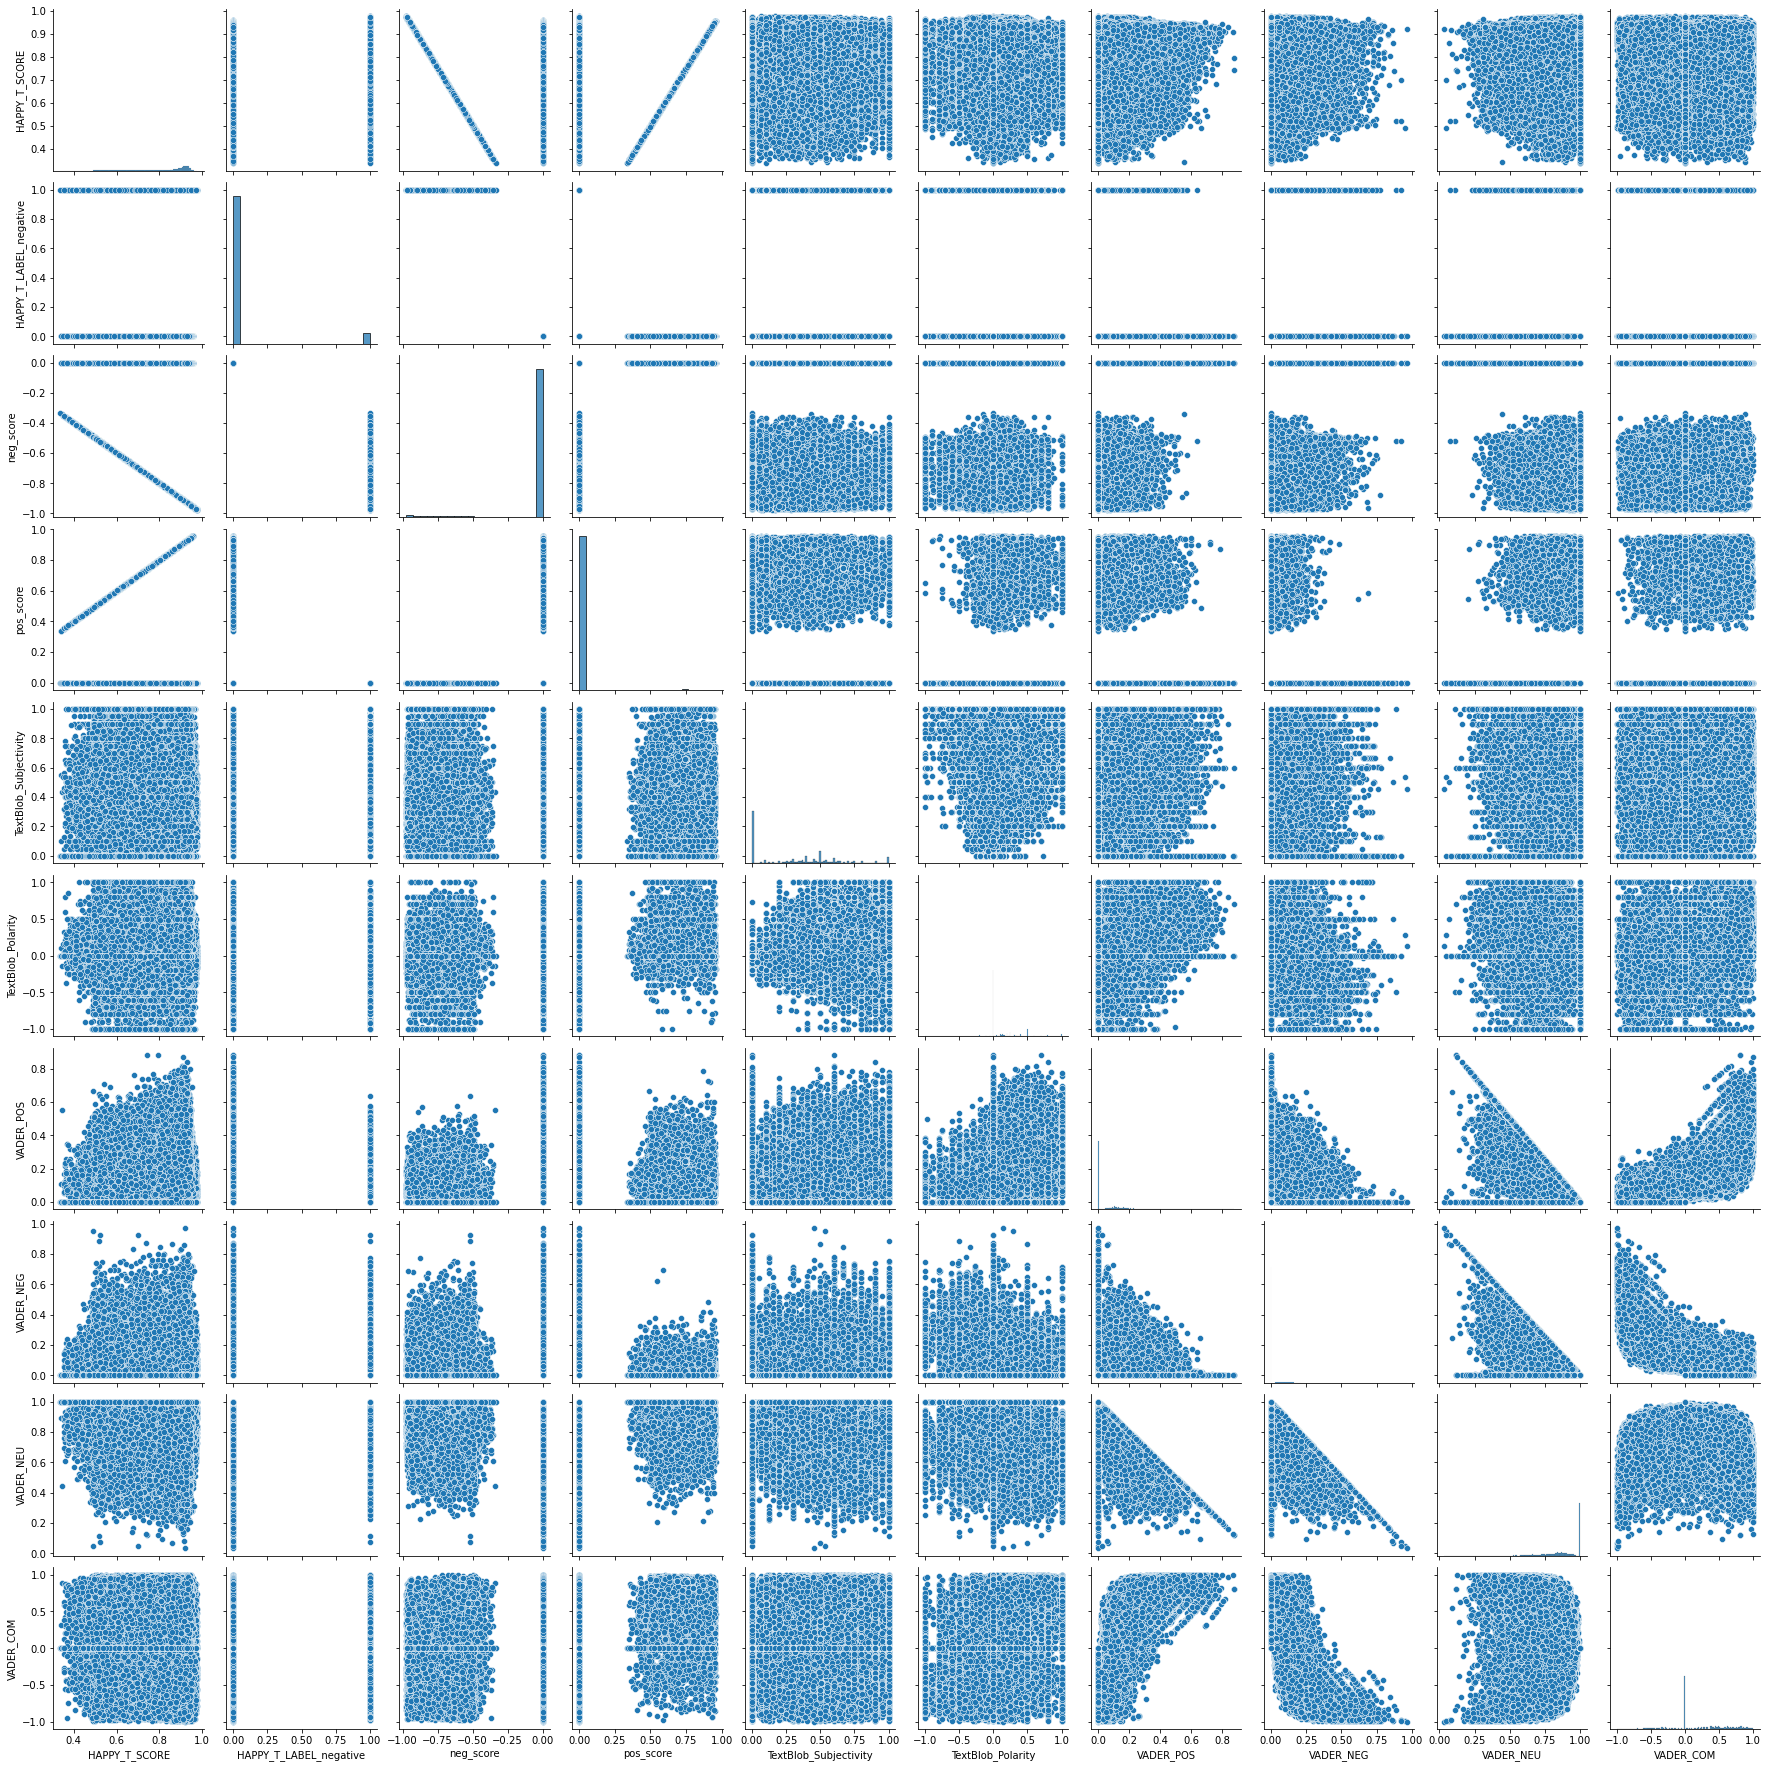

In [16]:
sns.pairplot(df.drop(['id', 'text_c', 'date', 'HAPPY_T_LABEL_neutral', 'HAPPY_T_LABEL_neutral', 'HAPPY_T_LABEL_positive'], axis =1))



## Text Blob: Polarity

(223023, 16)


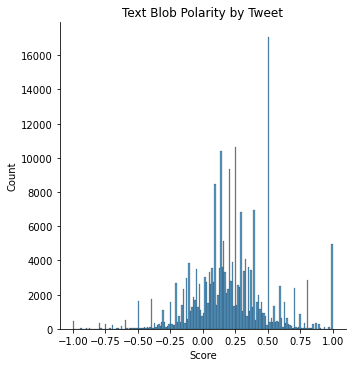

In [113]:
# Filtering tweets with polarity
text_blob_pol = df[df['TextBlob_Polarity'] != 0] 
print(text_blob_pol.shape)

ax = sns.displot(text_blob_pol['TextBlob_Polarity'])
ax.set(xlabel='Score', ylabel='Count', title = 'Text Blob Polarity by Tweet')

ax.savefig("../figures/TB_Pol_tweet.png") # To insert in paper
plt.show() 

In [115]:
TB_pol_des = text_blob_pol['TextBlob_Polarity'].describe()
TB_pol_des

count    223023.000000
mean          0.216953
std           0.293927
min          -1.000000
25%           0.062500
50%           0.200000
75%           0.400000
max           1.000000
Name: TextBlob_Polarity, dtype: float64

In [116]:
# Polarity by day
tbpolarity_day = text_blob_pol.groupby('date').mean()['TextBlob_Polarity'].to_frame().reset_index()
tbpolarity_day['date'] = pd.to_datetime(tbpolarity_day['date'])
tbpolarity_day.sort_values(by='date', inplace=True)

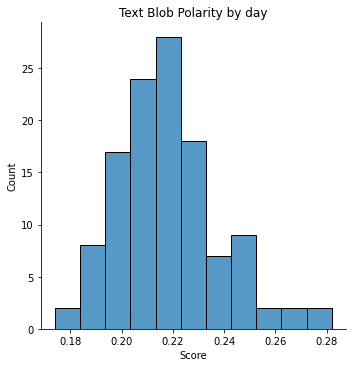

In [117]:
ax = sns.displot(tbpolarity_day['TextBlob_Polarity'])
ax.set(xlabel='Score', ylabel='Count', title = 'Text Blob Polarity by day')
ax.savefig("../figures/TB_Pol_day_hist.png") # To insert in paper

plt.show()

In [76]:
g2 = px.line(tbpolarity_day, 
             x="date", 
             y="TextBlob_Polarity", 
             title='TB Polarity July - October 2021',
             labels={
                     "date": "Date",
                     "TextBlob_Polarity": "Text Blob Polarity Score"
                 })
g2.show()

## Text Blob: Subjectivy

(223023, 16)


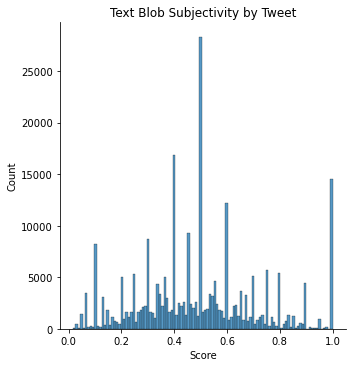

In [118]:
# Filtering tweets with polarity
text_blob_sub = df[df['TextBlob_Subjectivity'] != 0] 
print(text_blob_pol.shape)

ax = sns.displot(text_blob_sub['TextBlob_Subjectivity'])
ax.set(xlabel='Score', ylabel='Count', title = 'Text Blob Subjectivity by Tweet')

ax.savefig("../figures/TB_Sub_tweet.png") # To insert in paper
plt.show() 

In [124]:
TB_sub_des = text_blob_pol['TextBlob_Subjectivity'].describe()
TB_sub_des

count    223023.000000
mean          0.508786
std           0.216820
min           0.000000
25%           0.366667
50%           0.500000
75%           0.633333
max           1.000000
Name: TextBlob_Subjectivity, dtype: float64

In [119]:
# Subjectivity by day
tbsub_day = text_blob_sub.groupby('date').mean()['TextBlob_Subjectivity'].to_frame().reset_index()
tbsub_day['date'] = pd.to_datetime(tbsub_day['date'])
tbsub_day.sort_values(by='date', inplace=True)

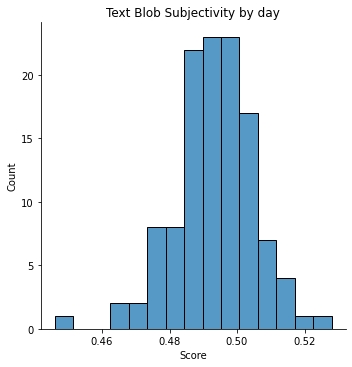

In [120]:
ax = sns.displot(tbsub_day['TextBlob_Subjectivity'])
ax.set(xlabel='Score', ylabel='Count', title = 'Text Blob Subjectivity by day')
ax.savefig("../figures/TB_Sub_day_hist.png") # To insert in paper

plt.show()

## Vader: Compound score

(254630, 16)


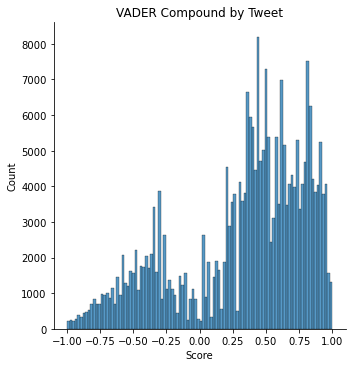

In [127]:
# Filtering sentimental tweets (with negative and positive scores, no neutral tweets)
vader_compound = df[df['VADER_COM'] != 0]
print(vader_compound.shape)

ax = sns.displot(vader_compound['VADER_COM'])
ax.set(xlabel='Score', ylabel='Count', title = 'VADER Compound by Tweet')

ax.savefig("../figures/TB_VADER_COMP_tweet.png") # To insert in paper
plt.show() 

In [125]:
VADER_com_des = vader_compound['VADER_COM'].describe()
VADER_com_des

count    254630.000000
mean          0.327829
std           0.480492
min          -0.999500
25%           0.077200
50%           0.440400
75%           0.700300
max           0.999800
Name: VADER_COM, dtype: float64

In [74]:
# Compound VADER by day
vaderComp_day = vader_compound.groupby('date').mean()['VADER_COM'].to_frame().reset_index()
vaderComp_day['date'] = pd.to_datetime(vaderComp_day['date'])
vaderComp_day.sort_values(by='date', inplace=True)

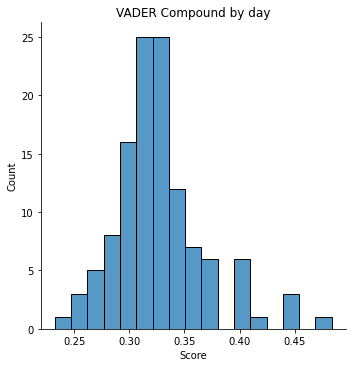

In [130]:
ax = sns.displot(vaderComp_day['VADER_COM'])
ax.set(xlabel='Score', ylabel='Count', title = 'VADER Compound by day')
ax.savefig("../figures/VADER_COMP_day_hist.png") # To insert in paper

plt.show() # To insert in paper

In [77]:
g2 = px.line(vaderComp_day, 
             x="date", 
             y="VADER_COM", 
             title='VADER Compound July - October 2021',
             labels={
                     "date": "Date",
                     "VADER_COM": "VADER Compound Score"
                 })
g2.show()

## VADER Positivity

In [80]:
# Filtering sentimental tweets (with negative and positive scores)
vader_positive = df[df['VADER_POS'] > 0]
print(vader_positive.shape)

(218618, 16)


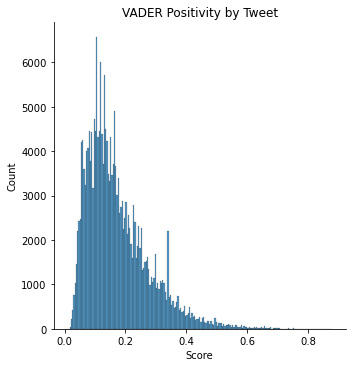

In [153]:
ax = sns.displot(vader_positive['VADER_POS']) 
ax.set(xlabel='Score', ylabel='Count', title = 'VADER Positivity by Tweet')

ax.savefig("../figures/TB_VADER_POS_tweet.png") # To insert in paper
plt.show() 

plt.show() # To insert in paper

In [129]:
VADER_pos_des = vader_positive['VADER_POS'].describe()
VADER_pos_des

count    218618.000000
mean          0.173155
std           0.102538
min           0.008000
25%           0.099000
50%           0.149000
75%           0.225000
max           0.880000
Name: VADER_POS, dtype: float64

In [83]:
# Positive VADER by day
vaderPos_day = vader_positive.groupby('date').mean()['VADER_POS'].to_frame().reset_index()
vaderPos_day['date'] = pd.to_datetime(vaderPos_day['date'])
vaderPos_day.sort_values(by='date', inplace=True)

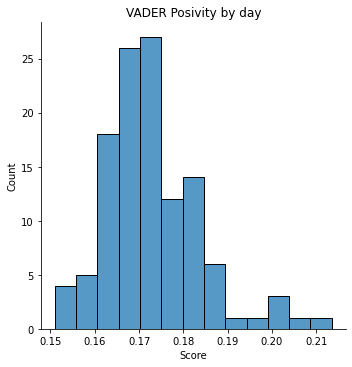

In [131]:
ax = sns.displot(vaderPos_day['VADER_POS'])
ax.set(xlabel='Score', ylabel='Count', title = 'VADER Posivity by day')
ax.savefig("../figures/VADER_POS_day_hist.png") # To insert in paper


plt.show() # To insert in paper

In [86]:
g3 = px.line(vaderPos_day, 
             x="date", 
             y="VADER_POS", 
             title='VADER Positive July - October 2021',
             labels={
                     "date": "Date",
                     "VADER_POS": "VADER Positivity Score"
                 })
g3.show()

## HAPPY Only positive tweets

In [88]:
# Filtering sentimental tweets according to the score of happy transformers
happy_positive = df[df['pos_score'] > 0]
print(happy_positive.shape)

(11764, 16)


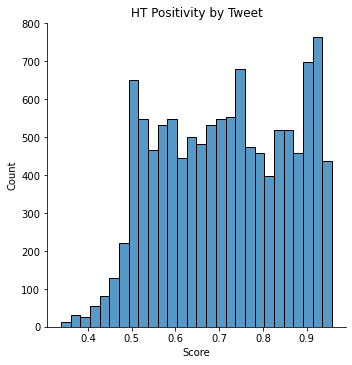

In [140]:
ax = sns.displot(happy_positive['pos_score']) 
ax.set(xlabel='Score', ylabel='Count', title = 'HT Positivity by Tweet')
ax.savefig("../figures/HP_pos_tweet.png") # To insert in paper

plt.show() # To insert in paper

In [133]:
ht_pos_des =  happy_positive['pos_score'].describe()
ht_pos_des

count    11764.000000
mean         0.713978
std          0.145958
min          0.338097
25%          0.586624
50%          0.718067
75%          0.843731
max          0.957892
Name: pos_score, dtype: float64

In [158]:
# Positive Happy by day
happyPos_day = happy_positive.groupby('date').mean()['pos_score'].to_frame().reset_index()
happyPos_day['date'] = pd.to_datetime(happyPos_day['date'])
happyPos_day.sort_values(by='date', inplace=True)

In [159]:
happyPos_day

,date,pos_score


In [ ]:
By day we only have

## HAPPY Only negative tweets

In [150]:
# Filtering sentimental tweets according to the score of happy transformers
happy_negative = df[df['neg_score'] < 0].copy()
happy_negative['neg_score'] = [score * -1 for score in happy_negative['neg_score']]
print(happy_negative.shape)

(25770, 16)


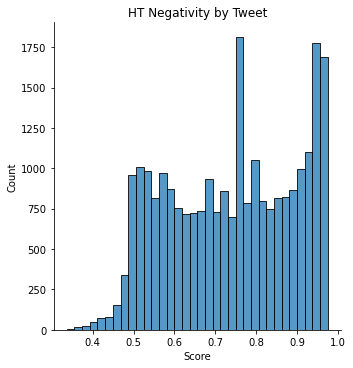

In [151]:
ax = sns.displot(happy_negative['neg_score']) 
ax.set(xlabel='Score', ylabel='Count', title = 'HT Negativity by Tweet')
ax.savefig("../figures/HP_neg_tweet.png") # To insert in paper

plt.show() # To insert in paper

In [161]:
ht_neg_des = happy_negative['neg_score'].describe()
ht_neg_des

count    25770.000000
mean         0.740039
std          0.154588
min          0.336542
25%          0.601404
50%          0.759796
75%          0.881231
max          0.975529
Name: neg_score, dtype: float64

In [152]:
# Negative Happy by day

happyNeg_day = happy_negative.groupby('date').mean()['neg_score'].to_frame().reset_index()
happyNeg_day['date'] = pd.to_datetime(happyNeg_day['date'])
happyNeg_day.sort_values(by='date', inplace=True)

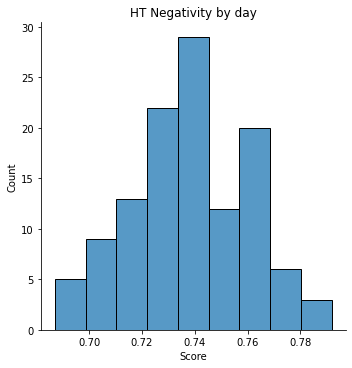

In [154]:
ax = sns.displot(happyNeg_day['neg_score'])
ax.set(xlabel='Score', ylabel='Count', title = 'HT Negativity by day')
ax.savefig("../figures/HT_HEG_day_hist.png") # To insert in paper


plt.show() # To insert in paper

In [156]:
g3 = px.line(happyNeg_day, 
             x="date", 
             y="neg_score", 
             title='HT Negativity July - October 2021',
             labels={
                     "date": "Date",
                     "neg_score": "HT Negativity Score"
                 })
g3.show()

## HAPPY daily of positive - negative

In [178]:
# Column for positve negative score of HT
#df['HT_pos_neg'] = df['pos_score'] + df['neg_score'] 
df['HT_pos_neg'] = np.where(df['pos_score'] > 0, df['pos_score'], 
                           np.where(df['neg_score'] < 0, df['neg_score'], 0))
#happy_comp = df[(df['pos_score'] > 0) | (df['neg_score'] < 0)]
happy_comp = df[(df['HT_pos_neg'] != 0)]
print(happy_comp.shape)

(37534, 17)


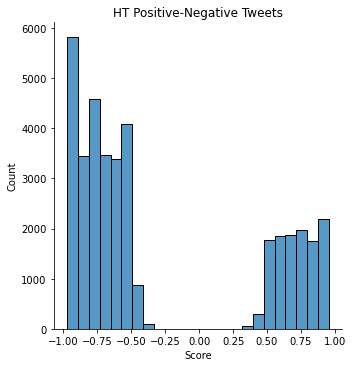

In [182]:
ax = sns.displot(happy_comp['HT_pos_neg']) 
ax.set(xlabel='Score', ylabel='Count', title = 'HT Positive-Negative Tweets')
ax.savefig("../figures/HP_posneg_tweet.png") # To insert in paper

plt.show() # To insert in paper

In [188]:
ht_comp_des = happy_comp['HT_pos_neg'].describe()
ht_comp_des

count    37534.000000
mean        -0.284318
std          0.691405
min         -0.975529
25%         -0.812184
50%         -0.615690
75%          0.565032
max          0.957892
Name: HT_pos_neg, dtype: float64

In [180]:
# Sort of compound by dya
happyPosNeg_day = happy_comp.groupby('date').mean()['HT_pos_neg'].to_frame().reset_index()
happyPosNeg_day['date'] = pd.to_datetime(happyPosNeg_day['date'])
happyPosNeg_day.sort_values(by='date', inplace=True)

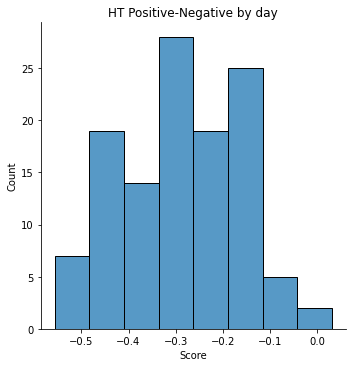

In [184]:
ax = sns.displot(happyPosNeg_day['HT_pos_neg'])
ax.set(xlabel='Score', ylabel='Count', title = 'HT Positive-Negative by day')
ax.savefig("../figures/HT_HEG_posneg_hist.png") # To insert in paper

plt.show() # To insert in paper

In [257]:
g3 = px.line(happyPosNeg_day, 
             x="date", 
             y="HT_pos_neg", 
             title='HT Compound July - October 2021',
             labels={
                     "date": "Date",
                     "HT_pos_neg": "HT Positivity-Negativity Score"
                 })
g3.show()

### One table of summnary statistics of scores

In [189]:
summary_scores_tweet_table = pd.concat([VADER_com_des, VADER_pos_des, TB_sub_des, TB_pol_des, ht_pos_des, ht_neg_des, ht_comp_des], axis = 1)
summary_scores_tweet_table.to_csv('../summary_tables/summary_scores_tweet.csv')
summary_scores_tweet_table

,VADER_COM,VADER_POS,TextBlob_Subjectivity,TextBlob_Polarity,pos_score,neg_score,HT_pos_neg
count,254630.000000,218618.000000,223023.000000,223023.000000,11764.000000,25770.000000,37534.000000
mean,0.327829,0.173155,0.508786,0.216953,0.713978,0.740039,-0.284318
std,0.480492,0.102538,0.216820,0.293927,0.145958,0.154588,0.691405
min,-0.999500,0.008000,0.000000,-1.000000,0.338097,0.336542,-0.975529
25%,0.077200,0.099000,0.366667,0.062500,0.586624,0.601404,-0.812184
50%,0.440400,0.149000,0.500000,0.200000,0.718067,0.759796,-0.615690
75%,0.700300,0.225000,0.633333,0.400000,0.843731,0.881231,0.565032
max,0.999800,0.880000,1.000000,1.000000,0.957892,0.975529,0.957892


### One plot of daily scores

In [236]:
# Merge the scores to compare

scores = pd.concat([tbsub_day, 
           tbpolarity_day['TextBlob_Polarity'], 
           vaderComp_day['VADER_COM'], 
           vaderPos_day['VADER_POS'],
           happyNeg_day['neg_score'], 
           happyPosNeg_day['HT_pos_neg']], axis = 1)

scores.columns = ['date', 'TB Subjectivity', 'TB Polarity', 'VADER Compound', 'VADER Positivility', 'HT Negativity', 'HT Compound']


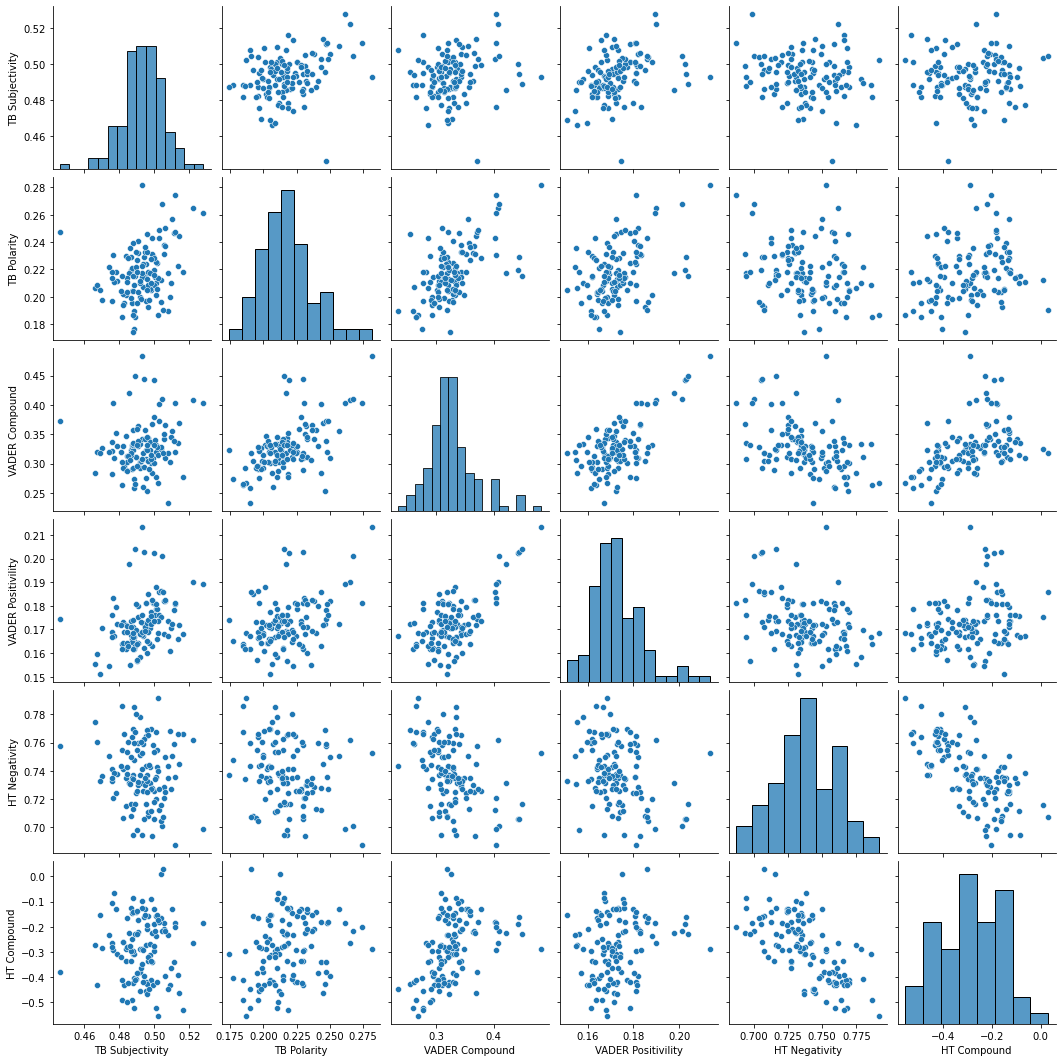

In [239]:
ax = sns.pairplot(scores)
ax.savefig("../figures/scores_pairplot.png") # To insert in paper

In [238]:
# Figure with the time lines of the scores
scores_forplot = pd.melt(scores, 'date', var_name = 'Sentiment', value_name = 'Score')

In [232]:
g_all = px.line(scores_forplot, 
                x="date", 
                y="Score", 
                color = "Sentiment", 
                labels={
                     "date": "Date",
                     "HT_pos_neg": "HT Positivity-Negativity Score"
                 })

g_all.show()
#g_all.write_image('../figues/time_line_all.jpg')

In [240]:
# Selecting only three scores
scores_forplot_selected = scores_forplot[scores_forplot['Sentiment'].isin(['TB Polarity', 'VADER Compound', 'HT Compound'])]

In [241]:
g_all = px.line(scores_forplot_selected, 
                x="date", 
                y="Score", 
                color = "Sentiment", 
                labels={
                     "date": "Date",
                     "HT_pos_neg": "HT Positivity-Negativity Score"
                 })

g_all.show()

## Incluiding BItCOIN PRice data

In [254]:
bitcoin = yf.download(['BTC-USD'], start='2021-07-01', end='2021-10-31')
bitcoin.reset_index(inplace=True)
print(bitcoin.shape)
print(bitcoin.columns)
bitcoin.head()

[*********************100%***********************]  1 of 1 completed
(123, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-30,35908.386719,36074.757812,34086.152344,35040.835938,35040.835938,34059036099
1,2021-07-01,35035.984375,35035.984375,32883.781250,33572.117188,33572.117188,37838957079
2,2021-07-02,33549.601562,33939.589844,32770.679688,33897.046875,33897.046875,38728974942
3,2021-07-03,33854.421875,34909.261719,33402.695312,34668.546875,34668.546875,24383958643
4,2021-07-04,34665.566406,35937.566406,34396.476562,35287.781250,35287.781250,24924307911


In [266]:
scores.rename(columns={'date' : 'Date'}, inplace=True)
btc_scores = pd.merge(scores, bitcoin[['Date', 'Close']], on = 'Date')
btc_scores_filt = pd.merge(scores[['Date', 'TB Polarity', 'VADER Compound', 'HT Compound']], bitcoin[['Date', 'Close']], on = 'Date')
btc_scores_filt.set_index('Date', append=True)

,,TB Polarity,VADER Compound,HT Compound,Close
,Date,,,,
0,2021-07-01,0.204711,0.300419,-0.412024,33572.117188
1,2021-07-02,0.224065,0.322517,-0.420019,33897.046875
2,2021-07-03,0.250311,0.308944,-0.395595,34668.546875
3,2021-07-04,0.237891,0.342811,-0.209240,35287.781250
4,2021-07-05,0.246012,0.253572,-0.427272,33746.003906
...,...,...,...,...,...
114,2021-10-26,0.218038,0.331321,-0.227098,60363.792969
115,2021-10-27,0.195208,0.295292,-0.384429,58482.386719
116,2021-10-28,0.235509,0.306437,-0.277625,60622.136719


## Computing the correlation of price and sentiment index

In [267]:
btc_price = btc_scores['Close']
btc_logprice = np.log(btc_scores['Close'])
btc_scores_tb_sub = btc_scores['TB Subjectivity']
btc_scores_tb_pol = btc_scores['TB Polarity']
btc_scores_vad_com = btc_scores['VADER Compound']
btc_scores_vad_pos = btc_scores['VADER Positivility']
btc_scores_ht = btc_scores['HT Negativity']

In [268]:
btc_price.corr(btc_scores_tb_sub, method='pearson')
btc_price.corr(btc_scores_tb_pol, method='pearson')
btc_price.corr(btc_scores_vad_com, method='pearson')
btc_price.corr(btc_scores_vad_pos, method='pearson')
btc_price.corr(btc_scores_ht, method='pearson')

-0.37512396344966176

In [269]:
btc_logprice.corr(btc_scores_tb_sub, method='pearson')
btc_logprice.corr(btc_scores_tb_pol, method='pearson')
btc_logprice.corr(btc_scores_vad_com, method='pearson')
btc_logprice.corr(btc_scores_vad_pos, method='pearson')
btc_logprice.corr(btc_scores_ht, method='pearson')

-0.3906336350658746